In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [7]:
df = pd.read_csv('data/distritos_heladas.csv')

In [8]:
df.shape

(107, 11)

In [6]:
import pandas as pd
from preprocessing import fix_headers, preprocess_df

df_heladas = pd.read_excel('2017/DISTRITOS_PRIORIZADOS-POR-HELADAS.xlsx')
df_friaje = pd.read_excel('2017/DISTRITOS_PRIORIZADOS-POR-FRIAJE.xlsx')
df_tambos = pd.read_excel('2017/Anexo 4.xlsx')
df_zonas = pd.read_excel('2017/Anexo 2.xlsx')

df_heladas = fix_headers(df_heladas)
df_friaje = fix_headers(df_friaje)

for col in ['Departamento', 'Provincia', 'Distrito']:
    preprocess_df(df_heladas, col)
    preprocess_df(df_friaje, col)
    preprocess_df(df_tambos, col)
    
for col in ['DISTRITO', 'LOCAL DE DISTRIBUCIÓN DE BIENES', 'CCPP']:
    preprocess_df(df_tambos, col)
    
for col in ['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'TAMBO/LOCAL PARA ENTREGA DE  BIENES']:
    preprocess_df(df_zonas, col)

In [19]:
df_salud = fix_headers(pd.read_excel('2017/DISTRITOS_PRIORIZADOS-POR-HELADAS.xlsx', sheet_name=0))
df_vivienda = fix_headers(pd.read_excel('2017/DISTRITOS_PRIORIZADOS-POR-HELADAS.xlsx', sheet_name=1))
df_educacion = fix_headers(pd.read_excel('2017/DISTRITOS_PRIORIZADOS-POR-HELADAS.xlsx', sheet_name=2), n_fix_headers=4)
df_educacion = df_educacion.drop([col for col in df_educacion if 'Unnamed' in col], axis=1)

for col in ['Departamento', 'Provincia', 'Distrito']:
    preprocess_df(df_salud, col)
    preprocess_df(df_vivienda, col)
    preprocess_df(df_educacion, col)

## Datasets merge

In [12]:
df.head()

,N°,Departamento,Provincia,Ubigeo distrital,Distrito,UBIG_TAM,UBIGEO_CCP,UBIGEO_DIS,DISTRITO,CCPP,LOCAL DE DISTRIBUCIÓN DE BIENES
0,1,PUNO,CARABAYA,210302,AJOYANI,2103050035,2103050035,210305,CORANI,AYMAÑA,TAMBO AYMAÑA
1,2,PUNO,CARABAYA,210305,CORANI,2103050035,2103050035,210305,CORANI,AYMAÑA,TAMBO AYMAÑA
2,3,PUNO,CARABAYA,210306,CRUCERO,2103050035,2103050035,210305,CORANI,AYMAÑA,TAMBO AYMAÑA
3,4,PUNO,CARABAYA,210301,MACUSANI,2103050035,2103050035,210305,CORANI,AYMAÑA,TAMBO AYMAÑA
4,5,PUNO,CARABAYA,210310,USICAYOS,2103050035,2103050035,210305,CORANI,AYMAÑA,TAMBO AYMAÑA


In [23]:
df_salud.head()

,Ubigeo distrital,Departamento,Provincia,Distrito,T° Mínima P10 (°C),Frecuencia de heladas (días/mes),Defunciones por neumonías (< a 5 años),Tasa de mortalidad (< a 5 años),Casos de neumonías (< a 5 años),Tasa de neumonías (< a 5 años),Valor del IDS,Incidencia de Pobreza,Tasa de Desnutrición Crónica (< a 5 años),Tasa de Analfabetismo,Porc. viviendas según el material utilizado para cocinar,Nivel de Riesgo MINSA,Total del distrito,Población menor a 5 años,Población de 60 años a más
0,010101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,0 a 2,0 a 2 dias,0,0,21,10.6653,0.3158,12.27,14.6,3.53831,15.4818,MEDIO,28937,2036,2773
1,010102,AMAZONAS,CHACHAPOYAS,ASUNCION,0 a 2,0 a 2 dias,0,0,0,0,0.035,51.3,0,12.5926,96.4706,BAJO,288,24,45
2,010103,AMAZONAS,CHACHAPOYAS,BALSAS,-5 a 0,0 a 2 dias,0,0,1,5.68182,0.17,42.59,18.7,13.9423,91.7431,BAJO,1634,176,170
3,010104,AMAZONAS,CHACHAPOYAS,CHETO,0 a 2,0 a 2 dias,0,0,0,0,0.035,60.02,10.3,6.81818,91.4439,BAJO,591,50,67
4,010105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,0 a 2,0 a 2 dias,0,0,0,0,0.035,74.73,22.5,11.9691,99.0244,MEDIO,698,63,90


In [27]:
df_salud.columns

Index(['Ubigeo distrital', 'Departamento', 'Provincia', 'Distrito',
       'T° Mínima P10 (°C)', 'Frecuencia de heladas (días/mes)',
       'Defunciones por neumonías (< a 5 años)',
       'Tasa de mortalidad  (< a 5 años)', 'Casos de neumonías  (< a 5 años)',
       'Tasa de neumonías (< a 5 años)', 'Valor del IDS',
       'Incidencia de Pobreza', 'Tasa de Desnutrición Crónica (< a 5 años)',
       'Tasa de Analfabetismo',
       'Porc. viviendas según el material utilizado para cocinar ',
       'Nivel de Riesgo MINSA', 'Total del distrito',
       'Población menor a 5 años', 'Población de 60 años a más'],
      dtype='object')

In [29]:
join_columns = ['Departamento', 'Provincia', 'Distrito']
right_columns = ['T° Mínima P10 (°C)', 'Frecuencia de heladas (días/mes)', 'Total del distrito',
                 'Población menor a 5 años', 'Población de 60 años a más', 'Nivel de Riesgo MINSA']
df = pd.merge(df, df_salud[join_columns + right_columns], 'left', on=join_columns)

In [30]:
df_vivienda.head()

,Ubigeo distrital,Departamento,Provincia,Distrito,T° Mínima P10 (°C),Frecuencia de heladas (días/mes),Indice del material predominante de la vivienda,Incidencia de Pobreza,Tasa de Analfabetismo,Nivel de Riesgo MVCS,Total de viviendas por distrito,Viviendas con techos de calamina o categorías menores,Viviendas con pisos de tierra,Viviendas con paredes de adobe o categorías menores,Total de hogares,Número de Tambos en el distrito
0,010101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,0 a 2,0 a 2 dias,0.088361,12.27,3.53831,BAJO,6414,4226,1858,4201,6476,0
1,010102,AMAZONAS,CHACHAPOYAS,ASUNCION,0 a 2,0 a 2 dias,0.135062,51.3,12.5926,BAJO,85,79,80,59,87,0
2,010103,AMAZONAS,CHACHAPOYAS,BALSAS,-5 a 0,0 a 2 dias,0.123176,42.59,13.9423,BAJO,327,321,239,250,337,0
3,010104,AMAZONAS,CHACHAPOYAS,CHETO,0 a 2,0 a 2 dias,0.098162,60.02,6.81818,BAJO,187,165,111,163,193,0
4,010105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,0 a 2,0 a 2 dias,0.201914,74.73,11.9691,MEDIO,205,199,188,189,206,0


In [31]:
df_vivienda.columns

Index(['Ubigeo distrital', 'Departamento', 'Provincia', 'Distrito',
       'T° Mínima P10 (°C)', 'Frecuencia de heladas (días/mes)',
       'Indice del material predominante de la vivienda',
       'Incidencia de Pobreza', 'Tasa de Analfabetismo',
       'Nivel de Riesgo MVCS', 'Total de viviendas por distrito',
       'Viviendas con techos de calamina o categorías menores',
       'Viviendas con pisos de tierra',
       'Viviendas con paredes de adobe o categorías menores',
       'Total de hogares', 'Número de Tambos en el distrito'],
      dtype='object')

In [33]:
right_columns = ['Total de viviendas por distrito', 'Total de hogares', 
                 'Número de Tambos en el distrito', 'Nivel de Riesgo MVCS']
df = pd.merge(df, df_vivienda[join_columns + right_columns], 'left', on=join_columns)

In [34]:
df_educacion.head()

,Ubigeo distrital,Departamento,Provincia,Distrito,T° Mínima P10 (°C),Frecuencia de heladas (días/mes),Total de Instituciones Educativas del distrito,unidocentes,unidocentes/polidoscentes,no escolarizadas inicial/primaria,Total de instituciones educativas,Valor del Porcentaje,Incidencia de Pobreza,Tasa de Desnutrición Crónica (< a 5 años),Nivel de Riesgo MINEDU,Total de alumnos,Total de alumnos varones,Total de alumnos mujeres,Total de docentes
0,010101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,0 a 2,0 a 2 dias,10,3,1,4,8,80,12.27,14.6,MEDIO,79,40,39,5
1,010102,AMAZONAS,CHACHAPOYAS,ASUNCION,0 a 2,0 a 2 dias,2,2,0,0,2,100,51.3,0,MEDIO,11,8,3,2
2,010103,AMAZONAS,CHACHAPOYAS,BALSAS,-5 a 0,0 a 2 dias,15,6,1,6,13,86.6667,42.59,18.7,MEDIO,152,75,77,7
3,010104,AMAZONAS,CHACHAPOYAS,CHETO,0 a 2,0 a 2 dias,3,2,1,0,3,100,60.02,10.3,MEDIO,26,13,13,3
4,010105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,0 a 2,0 a 2 dias,7,3,2,1,6,85.7143,74.73,22.5,MEDIO,41,18,23,5


In [35]:
df_educacion.columns

Index(['Ubigeo distrital', 'Departamento', 'Provincia', 'Distrito',
       'T° Mínima P10 (°C)', 'Frecuencia de heladas (días/mes)',
       'Total de Instituciones Educativas del distrito', 'unidocentes',
       'unidocentes/polidoscentes', 'no escolarizadas inicial/primaria',
       'Total de instituciones educativas', 'Valor del Porcentaje',
       'Incidencia de Pobreza', 'Tasa de Desnutrición Crónica (< a 5 años)',
       'Nivel de Riesgo MINEDU', 'Total de alumnos',
       'Total de alumnos varones', 'Total de alumnos mujeres',
       'Total de docentes'],
      dtype='object')

In [37]:
right_columns = ['Total de instituciones educativas', 'Total de alumnos', 
                 'Total de docentes', 'Nivel de Riesgo MINEDU']
df = pd.merge(df, df_educacion[join_columns + right_columns], 'left', on=join_columns)

In [38]:
df.to_csv('data/merged_data.csv', index=False)

In [45]:
df['Frecuencia de heladas (días/mes)'].unique()

array(['10 a 20 dias', '20 a 31 dias', '5 a 10 dias', '2 a 5 dias'],
      dtype=object)

In [41]:
df.head()

,N°,Departamento,Provincia,Ubigeo distrital,Distrito,UBIG_TAM,UBIGEO_CCP,UBIGEO_DIS,DISTRITO,CCPP,LOCAL DE DISTRIBUCIÓN DE BIENES,T° Mínima P10 (°C),Frecuencia de heladas (días/mes),Total del distrito,Población menor a 5 años,Población de 60 años a más,Nivel de Riesgo MINSA,Total de viviendas por distrito,Total de hogares,Número de Tambos en el distrito,Nivel de Riesgo MVCS,Total de instituciones educativas,Total de alumnos,Total de docentes,Nivel de Riesgo MINEDU
0,1,PUNO,CARABAYA,210302,AJOYANI,2103050035,2103050035,210305,CORANI,AYMAÑA,TAMBO AYMAÑA,-14 a -11,10 a 20 dias,2099,289,179,ALTO,576,576,0,MUY ALTO,3,42,4,ALTO
1,2,PUNO,CARABAYA,210305,CORANI,2103050035,2103050035,210305,CORANI,AYMAÑA,TAMBO AYMAÑA,-20 a -14,10 a 20 dias,3956,549,301,ALTO,951,952,1,ALTO,11,102,8,ALTO
2,3,PUNO,CARABAYA,210306,CRUCERO,2103050035,2103050035,210305,CORANI,AYMAÑA,TAMBO AYMAÑA,-20 a -14,10 a 20 dias,9306,1184,765,MEDIO,1751,1839,0,MEDIO,55,331,25,ALTO
3,4,PUNO,CARABAYA,210301,MACUSANI,2103050035,2103050035,210305,CORANI,AYMAÑA,TAMBO AYMAÑA,-14 a -11,20 a 31 dias,13015,1845,831,MUY ALTO,3103,3111,0,ALTO,13,105,10,MUY ALTO
4,5,PUNO,CARABAYA,210310,USICAYOS,2103050035,2103050035,210305,CORANI,AYMAÑA,TAMBO AYMAÑA,-14 a -11,5 a 10 dias,23937,2911,1371,ALTO,2999,2999,0,ALTO,11,65,10,ALTO


In [4]:
df = pd.read_csv('data/merged_data.csv')

In [44]:
temperature_levels = ['-20 a -14', '-14 a -11', '-11 a -5']
df['T° Mínima P10 (°C)'] = pd.Categorical(df['T° Mínima P10 (°C)'], categories=temperature_levels)

In [46]:
frequency_levels = ['2 a 5 dias', '5 a 10 dias', '10 a 20 dias', '20 a 31 dias']
df['Frecuencia de heladas (días/mes)'] = pd.Categorical(df['Frecuencia de heladas (días/mes)'], categories=frequency_levels)

In [29]:
risk_levels = ['BAJO', 'MEDIO', 'ALTO', 'MUY ALTO']
df['Nivel de Riesgo MINSA'] = pd.Categorical(df['Nivel de Riesgo MINSA'], categories=risk_levels)
df['Nivel de Riesgo MVCS'] = pd.Categorical(df['Nivel de Riesgo MVCS'], categories=risk_levels)
df['Nivel de Riesgo MINEDU'] = pd.Categorical(df['Nivel de Riesgo MINEDU'], categories=risk_levels)

Text(0.5,1,'Frecuencia de heladas (días/mes)')

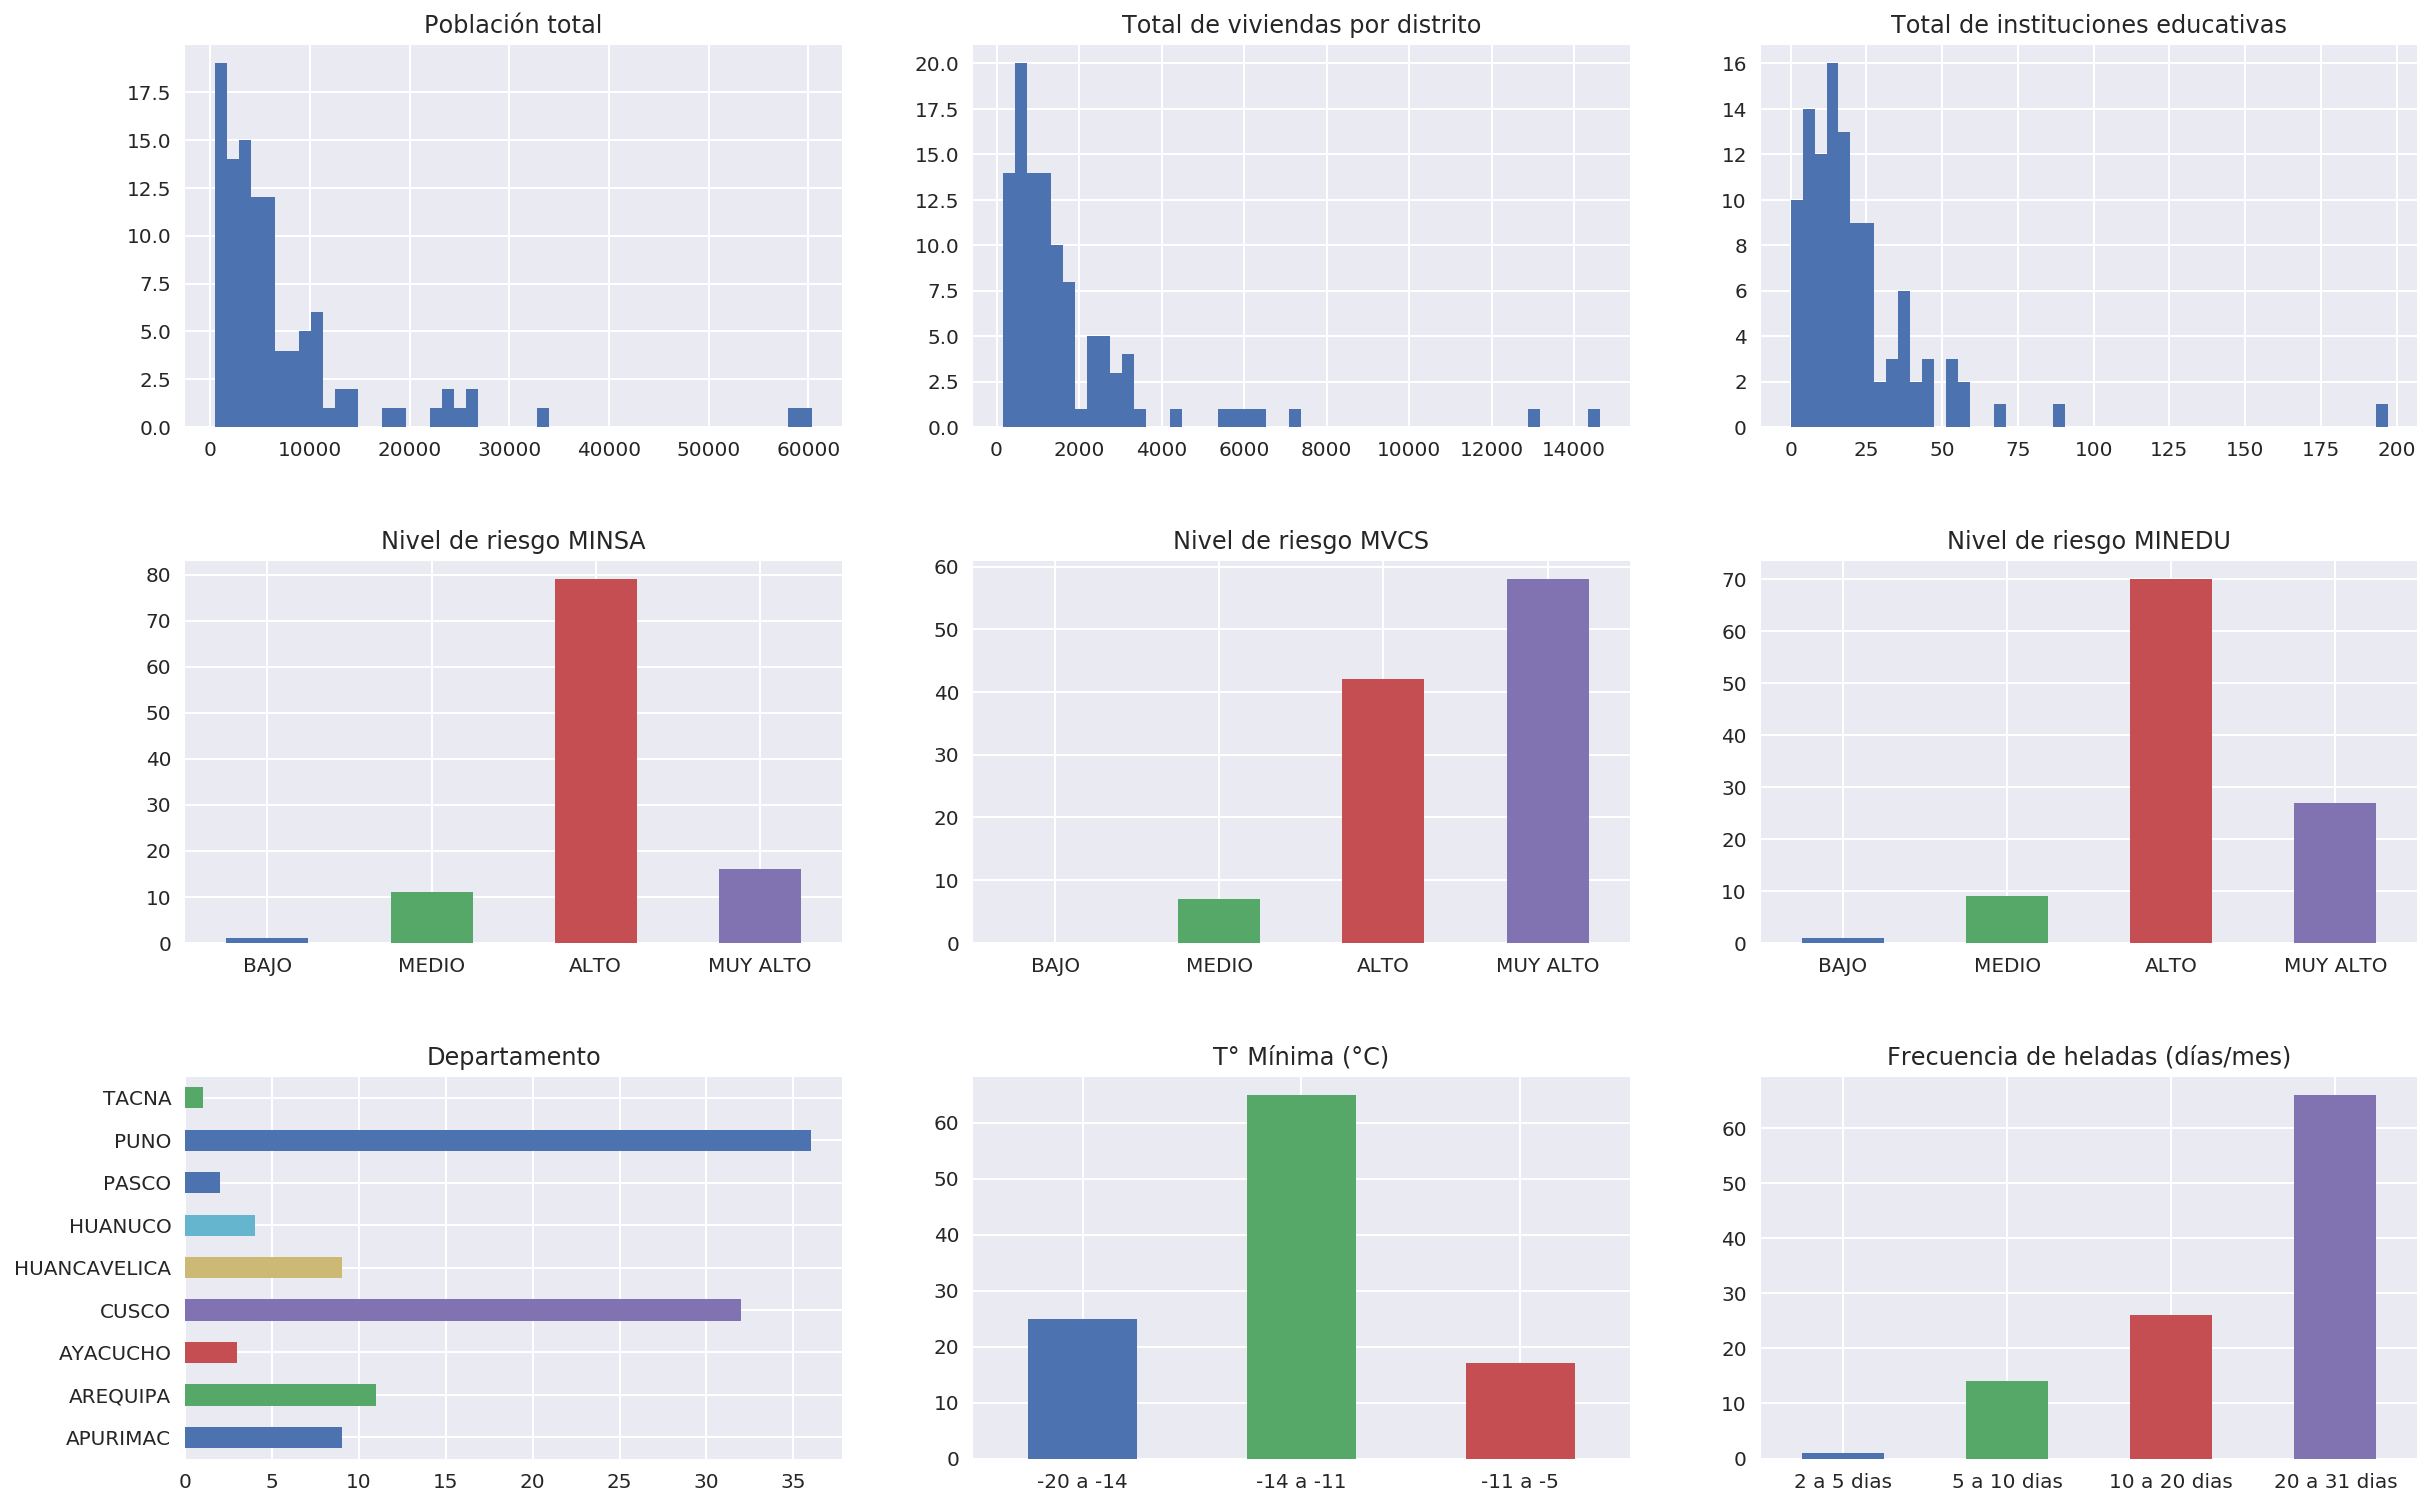

In [51]:
fig, axes = plt.subplots(3, 3, figsize=(20, 13))
fig.subplots_adjust(hspace=0.35)
df['Total del distrito'].hist(bins=50, ax=axes[0][0])
df['Total de viviendas por distrito'].hist(bins=50, ax=axes[0][1])
df['Total de instituciones educativas'].hist(bins=50, ax=axes[0][2])
df['Nivel de Riesgo MINSA'].value_counts().sort_index().plot.bar(ax=axes[1][0], rot=0)
df['Nivel de Riesgo MVCS'].value_counts().sort_index().plot.bar(ax=axes[1][1], rot=0)
df['Nivel de Riesgo MINEDU'].value_counts().sort_index().plot.bar(ax=axes[1][2], rot=0)
df['Departamento'].value_counts().sort_index().plot.barh(ax=axes[2][0], rot=0)
df['T° Mínima P10 (°C)'].value_counts().sort_index().plot.bar(ax=axes[2][1], rot=0)
df['Frecuencia de heladas (días/mes)'].value_counts().sort_index().plot.bar(ax=axes[2][2], rot=0)
axes[0][0].set_title('Población total')
axes[0][1].set_title('Total de viviendas por distrito')
axes[0][2].set_title('Total de instituciones educativas')
axes[1][0].set_title('Nivel de riesgo MINSA')
axes[1][1].set_title('Nivel de riesgo MVCS')
axes[1][2].set_title('Nivel de riesgo MINEDU')
axes[2][0].set_title('Departamento')
axes[2][1].set_title('T° Mínima (°C)')
axes[2][2].set_title('Frecuencia de heladas (días/mes)')

In [39]:
df[df['Total del distrito']>30000]

,N°,Departamento,Provincia,Ubigeo distrital,Distrito,UBIG_TAM,UBIGEO_CCP,UBIGEO_DIS,DISTRITO,CCPP,LOCAL DE DISTRIBUCIÓN DE BIENES,T° Mínima P10 (°C),Frecuencia de heladas (días/mes),Total del distrito,Población menor a 5 años,Población de 60 años a más,Nivel de Riesgo MINSA,Total de viviendas por distrito,Total de hogares,Número de Tambos en el distrito,Nivel de Riesgo MVCS,Total de instituciones educativas,Total de alumnos,Total de docentes,Nivel de Riesgo MINEDU
11,12,PUNO,EL COLLAO,210501,ILAVE,2105010022,2105010022,210501,ILAVE,CAMICACHI,TAMBO CAMICACHI,-14 a -11,20 a 31 dias,58210,5044,6178,MEDIO,14623,14741,3,ALTO,197,1214,71,ALTO
71,72,CUSCO,CANCHIS,80601,SICUANI,806030013,806030013,80603,COMBAPATA,CULLCUIRE,TAMBO CULLCUIRE,-20 a -14,20 a 31 dias,60363,5452,5969,MUY ALTO,13160,13170,0,MEDIO,46,476,33,ALTO
83,84,CUSCO,ESPINAR,80801,ESPINAR,808070083,808070083,80807,SUYCKUTAMBO,ESCALERA,TAMBO ESCALERAYOC,-14 a -11,20 a 31 dias,33520,3186,2561,ALTO,7380,7427,0,MEDIO,27,254,23,ALTO


## Geospatial Information

In [68]:
import requests
df['Latitud'] = pd.Series()
df['Longitud'] = pd.Series()
not_found = []
for idx, row in df.iterrows():
    address = ','.join([row['Distrito'].replace(' ','+'), 
                        row['Provincia'].replace(' ','+'), 
                        row['Departamento'].replace(' ','+')])
    if row['Latitud'] != row['Latitud']:
        response = requests.get(f'https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={API_KEY}')
        try:
            location = response.json()['results'][0]['geometry']['location']
            df.loc[idx, 'Latitud'] = location['lat']
            df.loc[idx, 'Longitud'] = location['lng']
        except:
            print(f'Location not found: {(idx)} {address}')
            not_found.append(idx)

Location not found: 9 CAPAZO,EL+COLLAO,PUNO
Location not found: 34 PEDRO+VILCA+APAZA,SAN+ANTONIO+DE+PUTINA,PUNO
Location not found: 61 KUNTURKANKI,CANAS,CUSCO
Location not found: 72 CAPACMARCA,CHUMBIVILCAS,CUSCO
Location not found: 84 OCORURO,ESPINAR,CUSCO
Location not found: 87 SUYCKUTAMBO,ESPINAR,CUSCO


In [71]:
locations = [
    '17°11′01″S 69°44′40″O',
    '15°03′44″S 69°53′01″O',
    '14°32′05″S 71°18′25″O',
    '14°00′28″S 72°00′06″O',
    '15°03′09″S 71°07′44″O',
    '15°04′08″S 71°44′52″O'
]

In [83]:
import re
def DMStoLL(coordinates):
    lat = re.sub('[^0-9]+', ' ', coordinates).split()
    return (-(float(lat[0]) + float(lat[1])/60 + float(lat[2])/3600),
            -(float(lat[3]) + float(lat[4])/60 + float(lat[5])/3600))

In [85]:
for idx, loc in zip(not_found, locations):
    latlong = DMStoLL(loc)
    df.loc[idx, 'Latitud'] = latlong[0]
    df.loc[idx, 'Longitud'] = latlong[1]

In [87]:
df.to_csv('data/merged_data.csv', index=False)

## Geospatial Visualization

In [128]:
import folium
import os

In [136]:
folium_colors = ['red', 'green', 'purple', 'orange', 'darkred', 'blue',
             'lightred', 'cadetblue', 'darkblue', 'lightblue', 'black', 'darkgreen', 
             'darkpurple', 'white', 'gray', 'lightgreen',
             'black', 'lightgray', 'beige']

df['Departamento'] = pd.Categorical(df['Departamento'])

In [143]:
m = folium.Map(
    location=[df.loc[56, 'Latitud'], df.loc[56, 'Longitud']],
    zoom_start=6,
    tiles='stamenterrain') # openstreetmap stamenterrain

m.choropleth(
    geo_data='data/peru_departamental_simple.geojson',
    name='choropleth',
    fill_color='lightblue',
    fill_opacity=0.3,
    line_opacity=1,
)

folium.LayerControl().add_to(m)

for idx, row in df.iterrows():
    folium.CircleMarker([row.Latitud, row.Longitud], radius=3,
            popup=f'<b>{row.Distrito}</b>', color=folium_colors[df.Departamento.cat.codes[idx]]).add_to(m)

m